In [1]:
# Stammdaten
rawdataFolder = "C:\\Users\\joerg_j\\switchdrive\\PSI\\22_e-Instrumentation\\HERO\\IPA\\Rohdaten"
campaignId    = "04_Setup_6"
measurementId = "200225_3"
signalAmplitude = 0.2

In [2]:
import sys
sys.path.append("../toolbox/")
from workflow import *
from jitterClass import analyseMeasurement
import importlib

read done


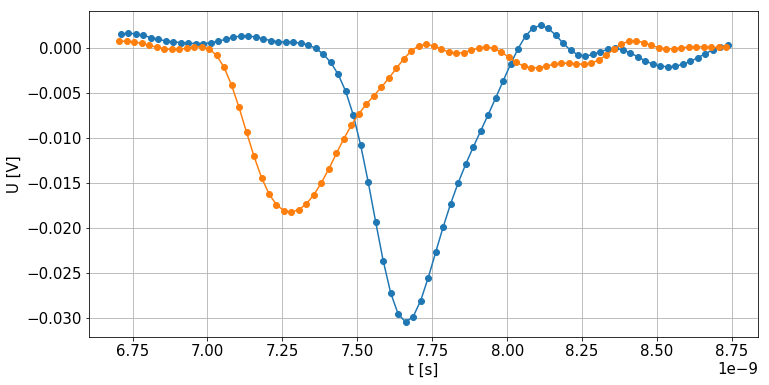

showRawPulse done


In [3]:
M18_02 = analyseMeasurement(rawdataFolder, campaignId, measurementId, signalAmplitude, diagnose = True)

M18_02.read()

M18_02.showRawPulse(pulseNr = 0, style="o-")

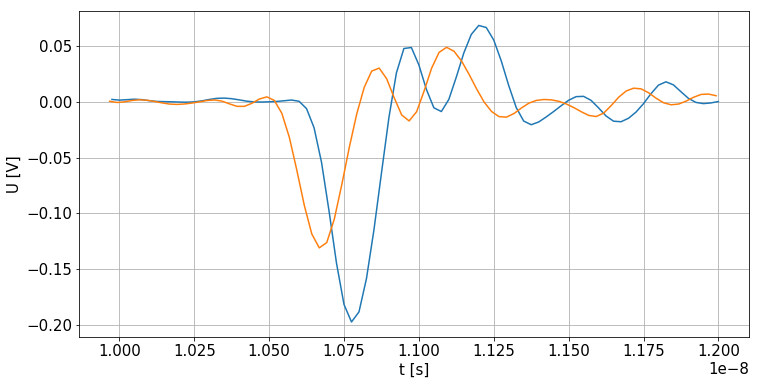

showRawPulse done


In [4]:
M18_02.showRawPulse(pulseNr = 0, style="-")

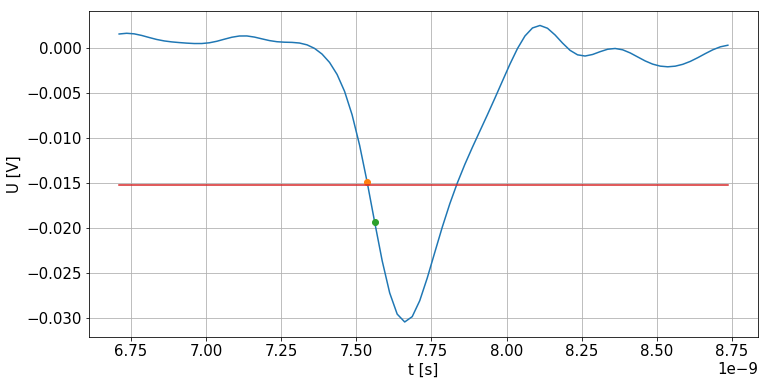

xt: 7.537962441467954e-09 ps, yt -0.015219746532807221 ps


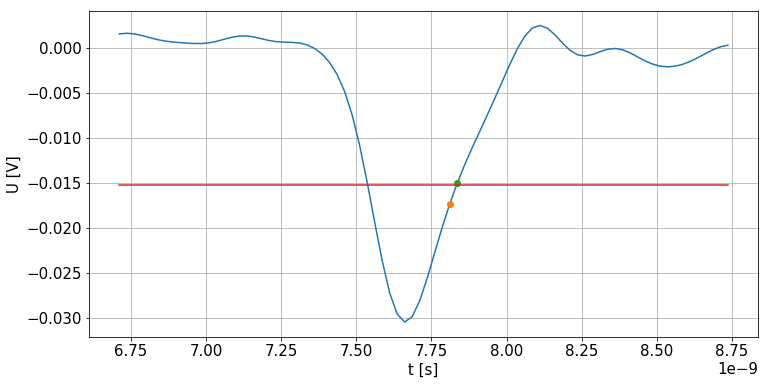

xt: 7.833920389524636e-09 ps, yt -0.015219746532807221 ps


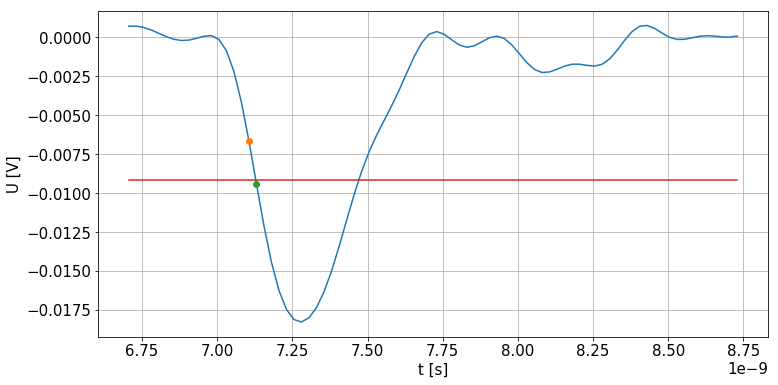

xt: 7.127955710067842e-09 ps, yt -0.009120121246155577 ps


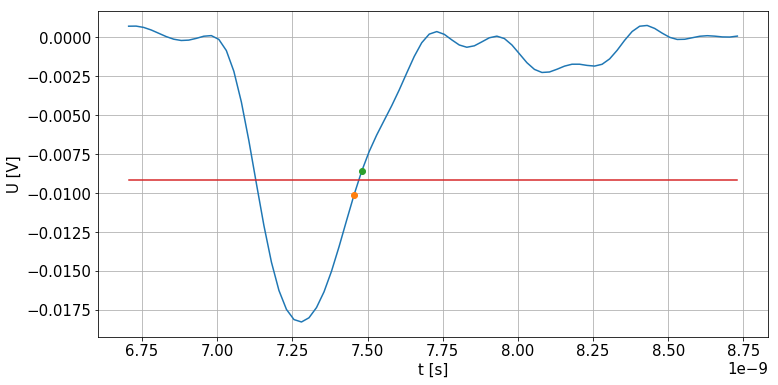

xt: 7.47130413807152e-09 ps, yt -0.009120121246155577 ps
calculateDelta done
calculateDelta done
calculateDelta done


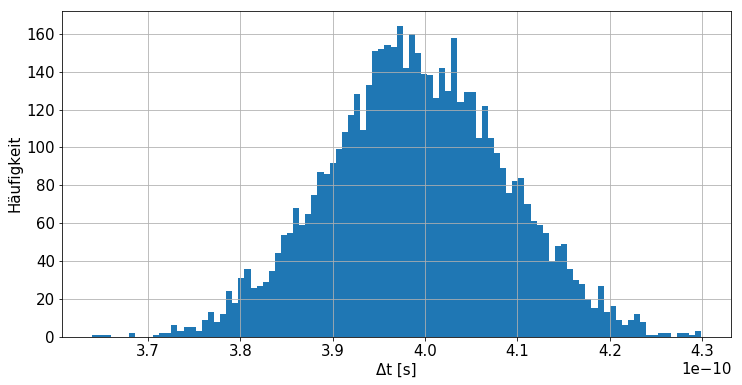

histogram done


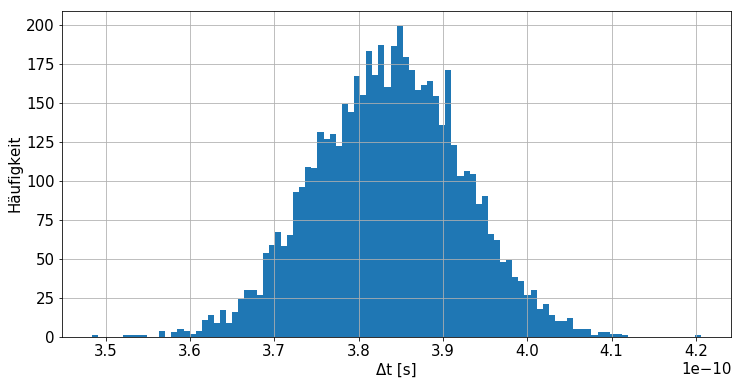

histogram done


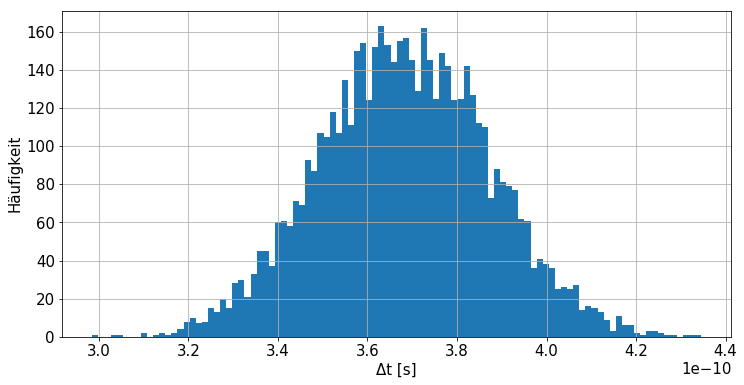

histogram done
50


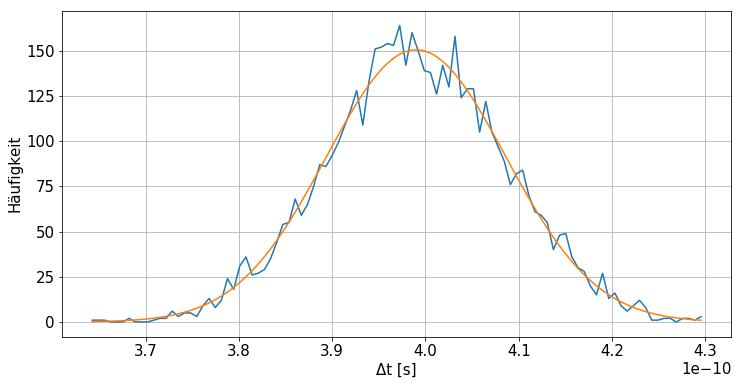

parameter: [3.63252536e-09 3.99004951e-10 9.62312304e-12] [A, mu, sigma]
fitHist done
50


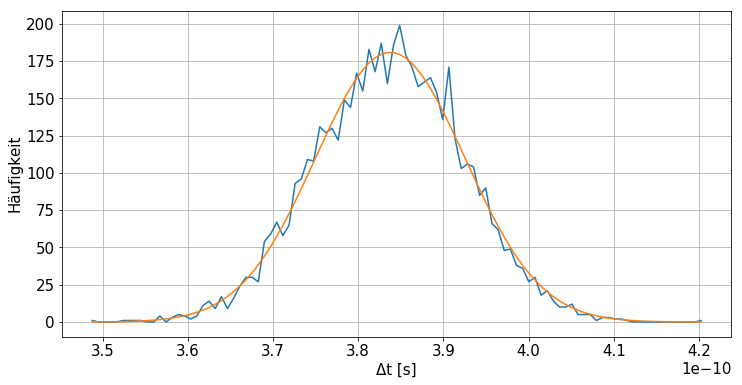

parameter: [3.99095833e-09 3.83767543e-10 8.79897232e-12] [A, mu, sigma]
fitHist done
47


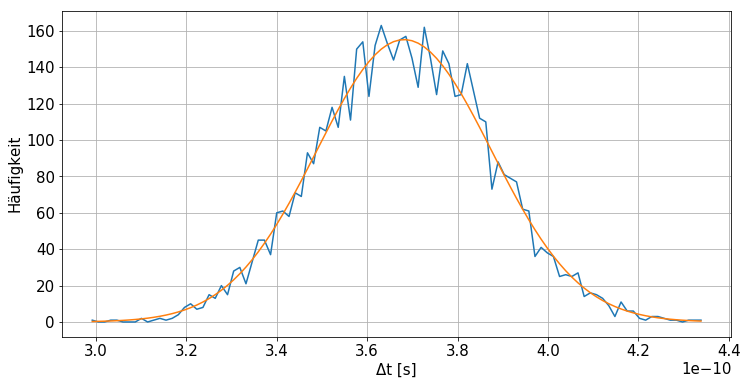

parameter: [7.52355804e-09 3.68179143e-10 1.93351047e-11] [A, mu, sigma]
fitHist done


In [19]:
absolute = False
threshold = 0.5

if(absolute):
    s = "Abs"
else:
    s = "Rel"
name = "thres{:d}".format(int(threshold * 100)) + s
 
M18_02.threshold(absolute = absolute, threshold = threshold)

M18_02.calculateDelta(name + "F", M18_02.data["thres"][name][0,0,:,0], M18_02.data["thres"][name][1,0,:,0])
M18_02.calculateDelta(name + "C", M18_02.data["thres"][name][0,1,:,0], M18_02.data["thres"][name][1,1,:,0])
M18_02.calculateDelta(name + "R", M18_02.data["thres"][name][0,2,:,0], M18_02.data["thres"][name][1,2,:,0])

M18_02.histogram(name + "F", name + "F")
M18_02.histogram(name + "C", name + "C")
M18_02.histogram(name + "R", name + "R")

M18_02.fitHist(name + "F", name + "F")
M18_02.fitHist(name + "C", name + "C")
M18_02.fitHist(name + "R", name + "R")

In [20]:
M18_02.showResult(name + "F")
print("---------------------------------------------------------------------------------------")
M18_02.showResult(name + "C")
print("---------------------------------------------------------------------------------------")
M18_02.showResult(name + "R")

σ_0: 9.623123043901987 ps
σ_1: 6.804575560535625 ps
σ_1 = σ_0 / sqrt(2)

μ: 399.00495097235495 ps

coma separated [σ_0, σ_1, μ]
9.623123043901987e-12,6.804575560535625e-12,3.9900495097235494e-10

 tab separated [σ_0, σ_1, μ]
9.623123043901987e-12	6.804575560535625e-12	3.9900495097235494e-10
---------------------------------------------------------------------------------------
σ_0: 8.798972321795862 ps
σ_1: 6.221812996214594 ps
σ_1 = σ_0 / sqrt(2)

μ: 383.7675431646385 ps

coma separated [σ_0, σ_1, μ]
8.798972321795861e-12,6.221812996214594e-12,3.837675431646385e-10

 tab separated [σ_0, σ_1, μ]
8.798972321795861e-12	6.221812996214594e-12	3.837675431646385e-10
---------------------------------------------------------------------------------------
σ_0: 19.33510474862125 ps
σ_1: 13.671983682702304 ps
σ_1 = σ_0 / sqrt(2)

μ: 368.1791425214733 ps

coma separated [σ_0, σ_1, μ]
1.9335104748621252e-11,1.3671983682702304e-11,3.6817914252147327e-10

 tab separated [σ_0, σ_1, μ]
1.93351047486212

iPeak: 38 iLeft: 30 iRight: 50


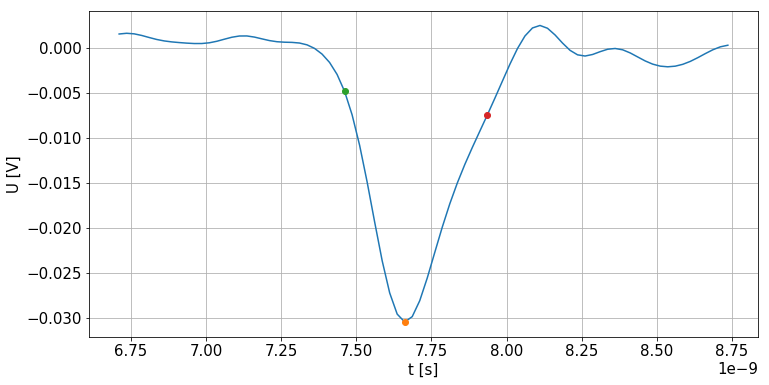

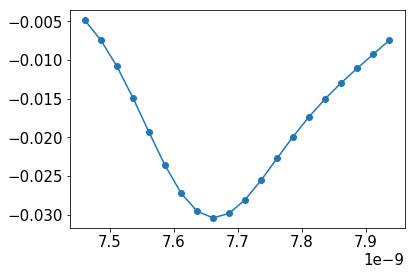

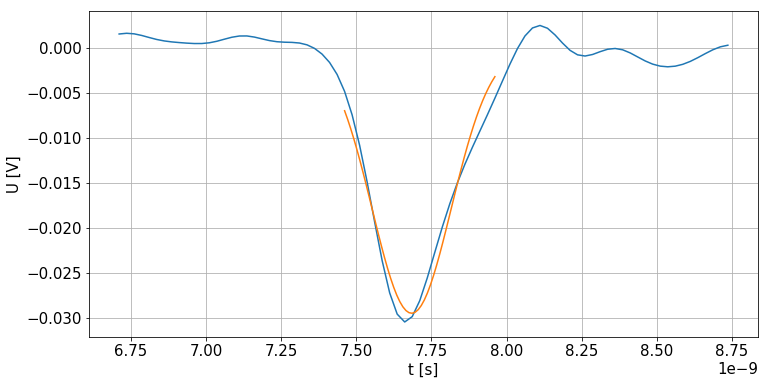

parameter: [-9.71607056e-12  7.68425403e-09  1.31509812e-10] [A, mu, sigma]
iPeak: 23 iLeft: 14 iRight: 36


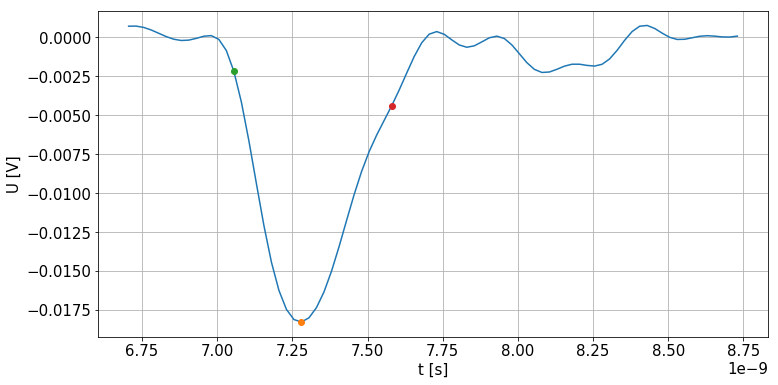

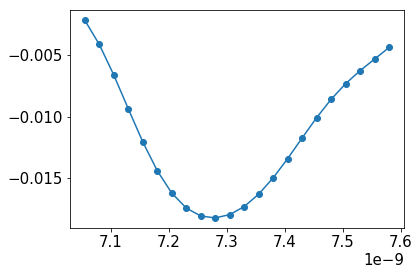

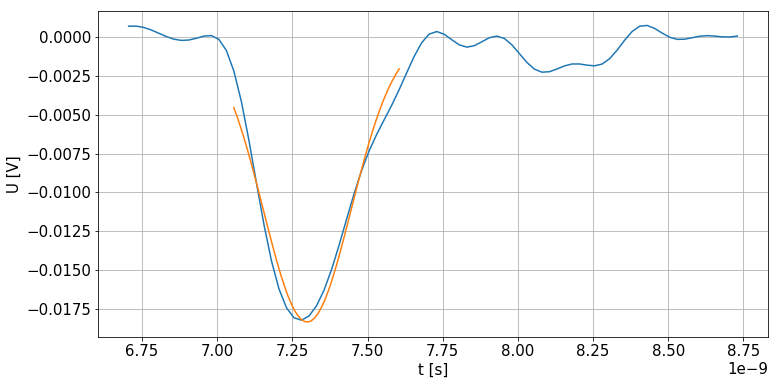

parameter: [-6.71230305e-12  7.29926682e-09  1.45842485e-10] [A, mu, sigma]
fitGauss done
calculateDelta done


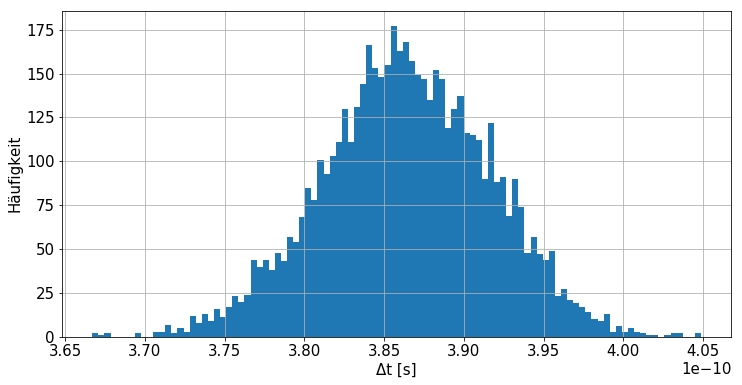

histogram done
49


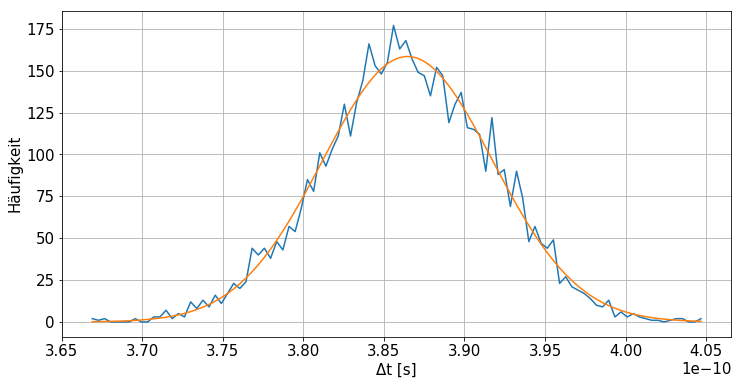

parameter: [2.10136677e-09 3.86469073e-10 5.28820670e-12] [A, mu, sigma]
fitHist done


In [17]:
M18_02.fitGauss(threshold = 0.2, diagnosePulse=0)

M18_02.calculateDelta("gauss", M18_02.data["gauss"][0,:,1], M18_02.data["gauss"][1,:,1])

M18_02.histogram("gauss", "gauss")

M18_02.fitHist("gauss", "gauss")

In [18]:
M18_02.showResult("gauss")

σ_0: 5.28820670234178 ps
σ_1: 3.739326819542023 ps
σ_1 = σ_0 / sqrt(2)

μ: 386.46907329966933 ps

coma separated [σ_0, σ_1, μ]
5.28820670234178e-12,3.739326819542023e-12,3.864690732996693e-10

 tab separated [σ_0, σ_1, μ]
5.28820670234178e-12	3.739326819542023e-12	3.864690732996693e-10


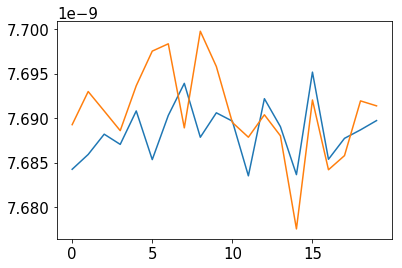

In [8]:
plt.plot(M18_02.data["gauss"][0,:,1][:20])
plt.plot(M18_02.data["gauss"][1,:,1][0:20] + 0.39e-9)

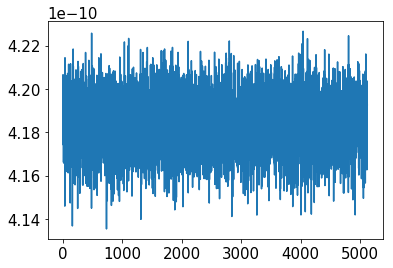

In [9]:
plt.plot(M18_02.data["gauss"][0,:,1] - M18_02.data["gauss"][1,:,1])

In [11]:
%load_ext autoreload

In [46]:
exportedDict = M18_02.exportDict()
%autoreload
M18_02 = analyseMeasurement(diagnose = True)
M18_02.importDict(exportedDict)

exportDict done
importDict done
